In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
passageiros = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv')
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [65]:
import seaborn as sns
import matplotlib as mpl

mpl.rcParams['figure.figsize']=(13,8)
mpl.rcParams['font.size']=15

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

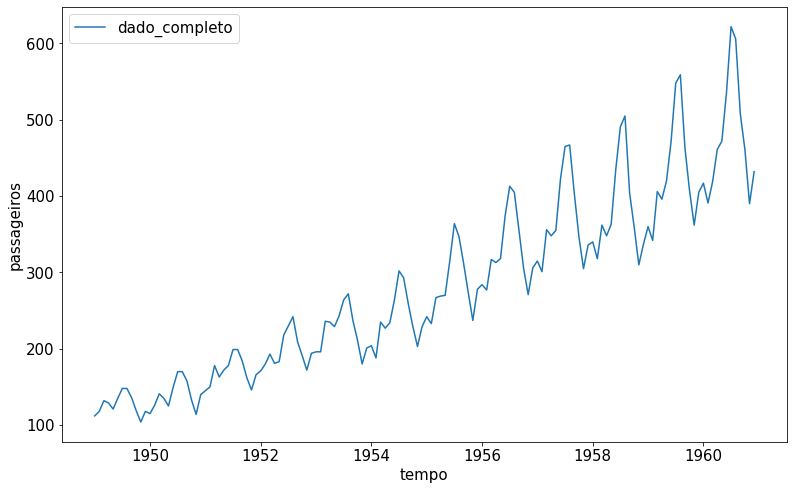

In [66]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo' )

In [5]:
sc = StandardScaler()
sc.fit(passageiros)

StandardScaler()

In [6]:
dado_escalado = sc.transform(passageiros)
x=dado_escalado[:,0]
y=dado_escalado[:,1]

Text(0.5, 0, 'Data')

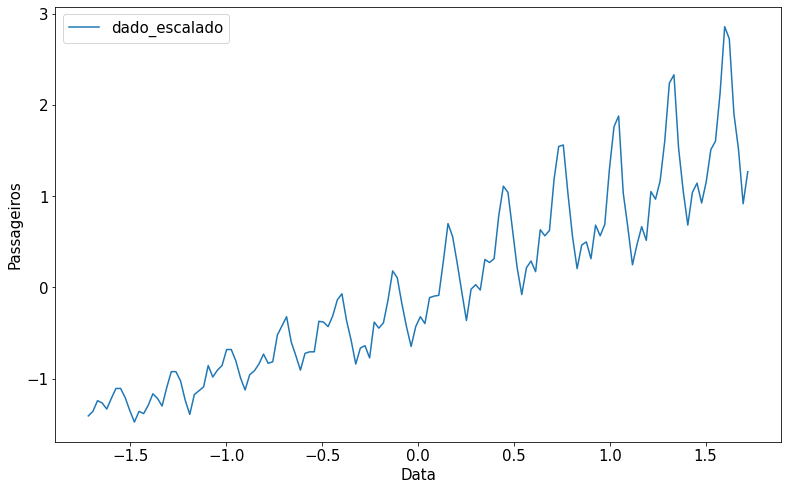

In [67]:
sns.lineplot(x=x,y=y,label='dado_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [8]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [9]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [10]:
xteste= x[tamanho_treino:len(passageiros)]
yteste= y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'Data')

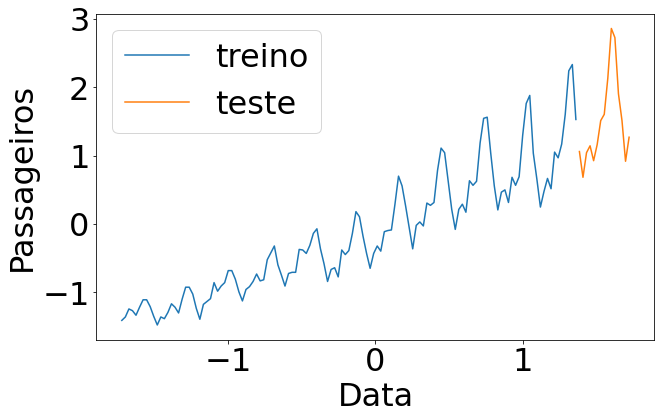

In [11]:
sns.lineplot(x=xtreino,y=ytreino, label= 'treino')
sns.lineplot(x=xteste,y=yteste, label= 'teste')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
regressor = Sequential()

In [14]:
regressor.add(Dense(1,input_dim=1, kernel_initializer='Ones', activation='linear',use_bias=False))

In [15]:
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [17]:
regressor.fit(xtreino, ytreino)

5/5 [==============================] - 0s 748us/step - loss: 0.1285


In [18]:
y_predict=regressor.predict(xtreino)

<AxesSubplot:>

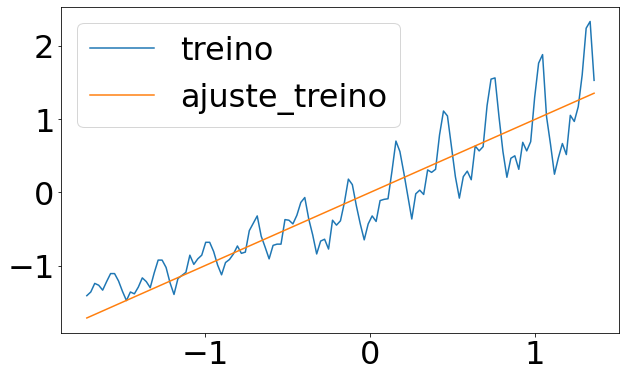

In [19]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')

In [20]:
d={'tempo': xtreino, 'passageiros':y_predict[:,0]}

In [21]:
resultados =pd.DataFrame(data=d)

In [22]:
resultados.head()

,tempo,passageiros
0,-1.720064,-1.711954
1,-1.696007,-1.688011
2,-1.671950,-1.664068
3,-1.647894,-1.640124
4,-1.623837,-1.616181


In [23]:
resultado_transf=sc.inverse_transform(resultados)

In [24]:
resultado_transf= pd.DataFrame(resultado_transf)

In [25]:
resultado_transf.columns = ['tempo', 'passageiros']

In [26]:
resultado_transf.head()

,tempo,passageiros
0,1949.000000,75.636095
1,1949.083333,78.498508
2,1949.166667,81.360921
3,1949.250000,84.223335
4,1949.333333,87.085762


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

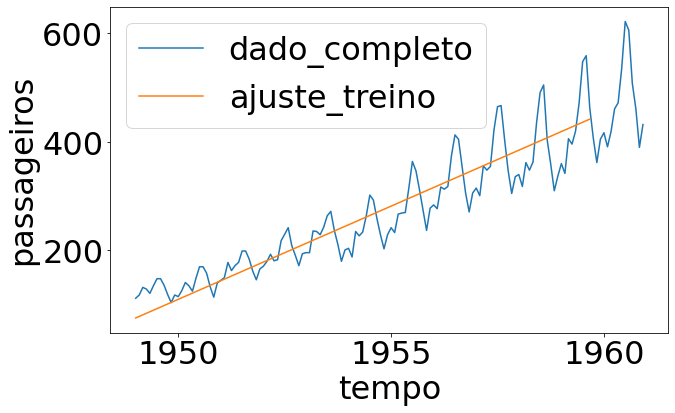

In [27]:
sns.lineplot(x='tempo', y='passageiros',data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_treino')

In [28]:
y_predic_teste=regressor.predict(xteste)

In [29]:
d={'tempo':xteste, 'passageiros':y_predic_teste[:,0]}
resultados_teste=pd.DataFrame(data=d)

In [30]:
resultado_transf_teste= sc.inverse_transform(resultados_teste)

In [31]:
resultado_transf_teste=pd.DataFrame(resultado_transf_teste)

In [32]:
resultado_transf_teste.columns=['tempo', 'passageiros']

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

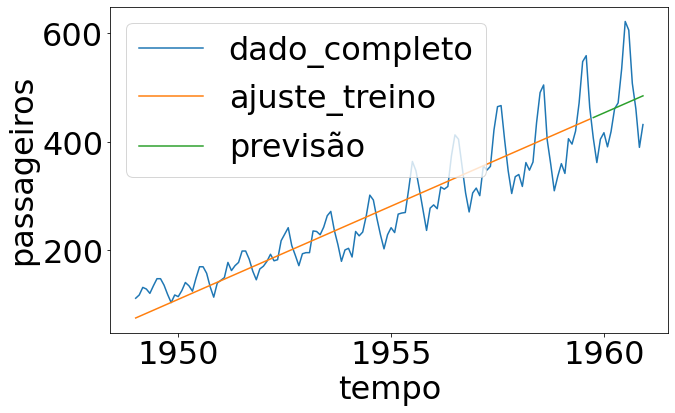

In [33]:
sns.lineplot(x='tempo', y='passageiros',data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_treino')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf_teste, label='previsão')

In [34]:
regressor2= Sequential()

In [35]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform',
                    activation='sigmoid', use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform',
                   activation='sigmoid', use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform',
                    activation='linear', use_bias=False))

In [36]:
regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [37]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [38]:
regressor2.fit(xtreino,ytreino, epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 749us/step - loss: 0.8060
Epoch 2/500
5/5 [==============================] - 0s 935us/step - loss: 0.8011
Epoch 3/500
5/5 [==============================] - 0s 997us/step - loss: 0.7979
Epoch 4/500
5/5 [==============================] - 0s 748us/step - loss: 0.7948
Epoch 5/500
5/5 [==============================] - 0s 886us/step - loss: 0.7946
Epoch 6/500
5/5 [==============================] - 0s 748us/step - loss: 0.7938
Epoch 7/500
5/5 [==============================] - 0s 764us/step - loss: 0.7918
Epoch 8/500
5/5 [==============================] - 0s 997us/step - loss: 0.7905
Epoch 9/500
5/5 [==============================] - 0s 956us/step - loss: 0.7895
Epoch 10/500
5/5 [==============================] - 0s 748us/step - loss: 0.7893
Epoch 11/500
5/5 [==============================] - 0s 998us/step - loss: 0.7892
Epoch 12/500
5/5 [==============================] - 0s 748us/step - loss: 0.7894
Epoch 13/500
5/5 [===================

5/5 [==============================] - 0s 748us/step - loss: 0.7576
Epoch 103/500
5/5 [==============================] - 0s 748us/step - loss: 0.7567
Epoch 104/500
5/5 [==============================] - 0s 997us/step - loss: 0.7558
Epoch 105/500
5/5 [==============================] - 0s 748us/step - loss: 0.7557
Epoch 106/500
5/5 [==============================] - 0s 997us/step - loss: 0.7551
Epoch 107/500
5/5 [==============================] - 0s 748us/step - loss: 0.7553
Epoch 108/500
5/5 [==============================] - 0s 748us/step - loss: 0.7548
Epoch 109/500
5/5 [==============================] - 0s 748us/step - loss: 0.7546
Epoch 110/500
5/5 [==============================] - 0s 748us/step - loss: 0.7566
Epoch 111/500
5/5 [==============================] - 0s 499us/step - loss: 0.7589
Epoch 112/500
5/5 [==============================] - 0s 997us/step - loss: 0.7587
Epoch 113/500
5/5 [==============================] - 0s 748us/step - loss: 0.7575
Epoch 114/500
5/5 [===========

5/5 [==============================] - 0s 748us/step - loss: 0.6431
Epoch 203/500
5/5 [==============================] - 0s 748us/step - loss: 0.6412
Epoch 204/500
5/5 [==============================] - 0s 748us/step - loss: 0.6395
Epoch 205/500
5/5 [==============================] - 0s 499us/step - loss: 0.6385
Epoch 206/500
5/5 [==============================] - 0s 748us/step - loss: 0.6375
Epoch 207/500
5/5 [==============================] - 0s 997us/step - loss: 0.6361
Epoch 208/500
5/5 [==============================] - 0s 748us/step - loss: 0.6345
Epoch 209/500
5/5 [==============================] - 0s 748us/step - loss: 0.6329
Epoch 210/500
5/5 [==============================] - 0s 918us/step - loss: 0.6315
Epoch 211/500
5/5 [==============================] - 0s 748us/step - loss: 0.6301
Epoch 212/500
5/5 [==============================] - 0s 748us/step - loss: 0.6286
Epoch 213/500
5/5 [==============================] - 0s 748us/step - loss: 0.6271
Epoch 214/500
5/5 [===========

5/5 [==============================] - 0s 997us/step - loss: 0.4724
Epoch 303/500
5/5 [==============================] - 0s 748us/step - loss: 0.4711
Epoch 304/500
5/5 [==============================] - 0s 748us/step - loss: 0.4696
Epoch 305/500
5/5 [==============================] - 0s 767us/step - loss: 0.4677
Epoch 306/500
5/5 [==============================] - 0s 997us/step - loss: 0.4657
Epoch 307/500
5/5 [==============================] - 0s 748us/step - loss: 0.4636
Epoch 308/500
5/5 [==============================] - 0s 748us/step - loss: 0.4622
Epoch 309/500
5/5 [==============================] - 0s 749us/step - loss: 0.4614
Epoch 310/500
5/5 [==============================] - 0s 748us/step - loss: 0.4595
Epoch 311/500
5/5 [==============================] - 0s 997us/step - loss: 0.4581
Epoch 312/500
5/5 [==============================] - 0s 877us/step - loss: 0.4565
Epoch 313/500
5/5 [==============================] - 0s 499us/step - loss: 0.4546
Epoch 314/500
5/5 [===========

5/5 [==============================] - 0s 706us/step - loss: 0.3373
Epoch 403/500
5/5 [==============================] - 0s 748us/step - loss: 0.3363
Epoch 404/500
5/5 [==============================] - 0s 749us/step - loss: 0.3353
Epoch 405/500
5/5 [==============================] - 0s 748us/step - loss: 0.3341
Epoch 406/500
5/5 [==============================] - 0s 886us/step - loss: 0.3329
Epoch 407/500
5/5 [==============================] - 0s 997us/step - loss: 0.3317
Epoch 408/500
5/5 [==============================] - 0s 997us/step - loss: 0.3306
Epoch 409/500
5/5 [==============================] - 0s 997us/step - loss: 0.3296
Epoch 410/500
5/5 [==============================] - 0s 998us/step - loss: 0.3286
Epoch 411/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3276
Epoch 412/500
5/5 [==============================] - 0s 748us/step - loss: 0.3266
Epoch 413/500
5/5 [==============================] - 0s 907us/step - loss: 0.3257
Epoch 414/500
5/5 [=============

In [39]:
y_predict=regressor2.predict(xtreino)
y_predic_teste=regressor2.predict(xteste)

<AxesSubplot:>

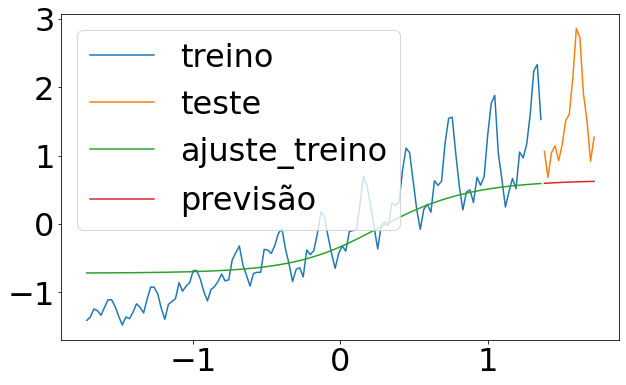

In [40]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste,label='teste')
sns.lineplot(x=xtreino, y=y_predict[:,0],  label='ajuste_treino')
sns.lineplot(x=xteste,y=y_predic_teste[:,0], label='previsão')

In [41]:
vetor = pd.DataFrame(ytreino)[0]

In [42]:
import numpy as np
def separa_dados(vetor, n_passos):
    X_novo, y_novo = [], []
    
    for i in range(n_passos, vetor.shape[0]):
        X_novo.append(list(vetor.loc[i-n_passos:i-1]))
        y_novo.append(vetor.loc[i])
    X_novo, y_novo= np.array(X_novo), np.array(y_novo)
    return X_novo, y_novo

In [43]:
xtreino_novo, ytreino_novo = separa_dados(vetor,1)

In [44]:
xtreino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [45]:
ytreino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [46]:
vetor2 = pd.DataFrame(yteste)[0]

In [47]:
xteste_novo, yteste_novo = separa_dados(vetor2,1)

In [48]:
regressor3 = Sequential()

In [49]:
regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones',
                    activation='linear', use_bias=False))
regressor3.add(Dense(64, input_dim=1, kernel_initializer='random_uniform',
                    activation='sigmoid', use_bias=False))
regressor3.add(Dense(1, input_dim=1, kernel_initializer='random_uniform',
                    activation='linear', use_bias=False))

In [50]:
regressor3.compile(loss='mean_squared_error', optimizer='adam')

In [51]:
regressor3.fit(xtreino_novo, ytreino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 997us/step - loss: 0.7839
Epoch 2/100
4/4 [==============================] - 0s 837us/step - loss: 0.7492
Epoch 3/100
4/4 [==============================] - 0s 998us/step - loss: 0.7221
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7058
Epoch 5/100
4/4 [==============================] - 0s 665us/step - loss: 0.6846
Epoch 6/100
4/4 [==============================] - 0s 998us/step - loss: 0.6620
Epoch 7/100
4/4 [==============================] - 0s 998us/step - loss: 0.6382
Epoch 8/100
4/4 [==============================] - 0s 997us/step - loss: 0.6148
Epoch 9/100
4/4 [==============================] - 0s 848us/step - loss: 0.5834
Epoch 10/100
4/4 [==============================] - 0s 997us/step - loss: 0.5492
Epoch 11/100
4/4 [==============================] - 0s 997us/step - loss: 0.5163
Epoch 12/100
4/4 [==============================] - 0s 665us/step - loss: 0.4788
Epoch 13/100
4/4 [=====================

In [52]:
y_predict_novo=regressor3.predict(xtreino_novo)

<AxesSubplot:xlabel='tempo', ylabel='0'>

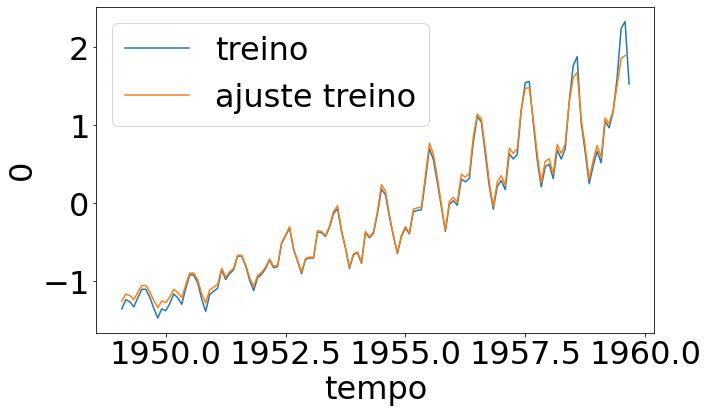

In [53]:
sns.lineplot(x='tempo', y=ytreino_novo, data= passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label= 'ajuste treino')

In [54]:
y_predic_teste_novo = regressor3.predict(xteste_novo)

In [55]:
resultado = pd.DataFrame(y_predic_teste_novo)[0]

<AxesSubplot:xlabel='tempo', ylabel='0'>

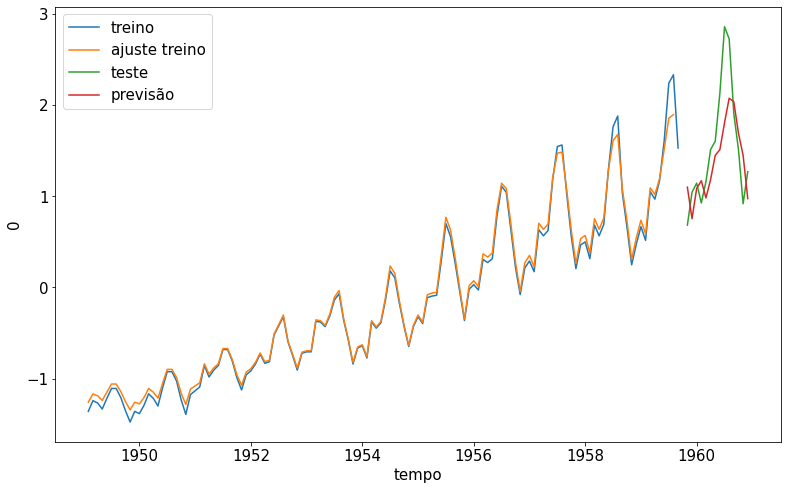

In [68]:
sns.lineplot(x='tempo', y=ytreino_novo, data= passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label= 'ajuste treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[130:144], label= 'teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[130:144], label= 'previsão')

In [70]:
xtreino_novo, ytreino_novo = separa_dados(vetor,4)

In [71]:
xtreino_novo[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [74]:
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [75]:
regressor4 = Sequential()

In [76]:
regressor4.add(Dense(8, input_dim=4, kernel_initializer='ones',
                    activation='linear', use_bias=False))
regressor4.add(Dense(64, input_dim=4, kernel_initializer='random_uniform',
                    activation='sigmoid', use_bias=False))
regressor4.add(Dense(1, input_dim=4, kernel_initializer='random_uniform',
                    activation='linear', use_bias=False))

In [77]:
regressor4.compile(loss='mean_squared_error', optimizer='adam')

In [78]:
regressor4.fit(xtreino_novo, ytreino_novo, epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 997us/step - loss: 0.7216
Epoch 2/300
4/4 [==============================] - 0s 995us/step - loss: 0.6474
Epoch 3/300
4/4 [==============================] - 0s 997us/step - loss: 0.5765
Epoch 4/300
4/4 [==============================] - 0s 997us/step - loss: 0.5087
Epoch 5/300
4/4 [==============================] - 0s 998us/step - loss: 0.4385
Epoch 6/300
4/4 [==============================] - 0s 997us/step - loss: 0.3774
Epoch 7/300
4/4 [==============================] - 0s 665us/step - loss: 0.3160
Epoch 8/300
4/4 [==============================] - 0s 997us/step - loss: 0.2671
Epoch 9/300
4/4 [==============================] - 0s 997us/step - loss: 0.2227
Epoch 10/300
4/4 [==============================] - 0s 664us/step - loss: 0.1903
Epoch 11/300
4/4 [==============================] - 0s 997us/step - loss: 0.1681
Epoch 12/300
4/4 [==============================] - 0s 665us/step - loss: 0.1525
Epoch 13/300
4/4 [===================

4/4 [==============================] - 0s 665us/step - loss: 0.1285
Epoch 103/300
4/4 [==============================] - 0s 997us/step - loss: 0.1279
Epoch 104/300
4/4 [==============================] - 0s 665us/step - loss: 0.1279
Epoch 105/300
4/4 [==============================] - 0s 997us/step - loss: 0.1275
Epoch 106/300
4/4 [==============================] - 0s 665us/step - loss: 0.1275
Epoch 107/300
4/4 [==============================] - 0s 997us/step - loss: 0.1278
Epoch 108/300
4/4 [==============================] - 0s 998us/step - loss: 0.1272
Epoch 109/300
4/4 [==============================] - 0s 997us/step - loss: 0.1269
Epoch 110/300
4/4 [==============================] - 0s 665us/step - loss: 0.1268
Epoch 111/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1265
Epoch 112/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1265
Epoch 113/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1262
Epoch 114/300
4/4 [=================

4/4 [==============================] - 0s 998us/step - loss: 0.1096
Epoch 203/300
4/4 [==============================] - 0s 997us/step - loss: 0.1099
Epoch 204/300
4/4 [==============================] - 0s 997us/step - loss: 0.1091
Epoch 205/300
4/4 [==============================] - 0s 997us/step - loss: 0.1093
Epoch 206/300
4/4 [==============================] - 0s 997us/step - loss: 0.1085
Epoch 207/300
4/4 [==============================] - 0s 665us/step - loss: 0.1089
Epoch 208/300
4/4 [==============================] - 0s 997us/step - loss: 0.1081
Epoch 209/300
4/4 [==============================] - 0s 665us/step - loss: 0.1080
Epoch 210/300
4/4 [==============================] - 0s 998us/step - loss: 0.1077
Epoch 211/300
4/4 [==============================] - 0s 997us/step - loss: 0.1075
Epoch 212/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1073
Epoch 213/300
4/4 [==============================] - 0s 997us/step - loss: 0.1072
Epoch 214/300
4/4 [=============

In [80]:
y_predic_novo = regressor4.predict(xtreino_novo)

In [81]:
y_predic_teste_novo = regressor4.predict(xteste_novo)

In [82]:
resultado_treino=pd.DataFrame(y_predic_novo)[0]

In [83]:
resultado=pd.DataFrame(y_predic_teste_novo)[0]

<AxesSubplot:xlabel='tempo'>

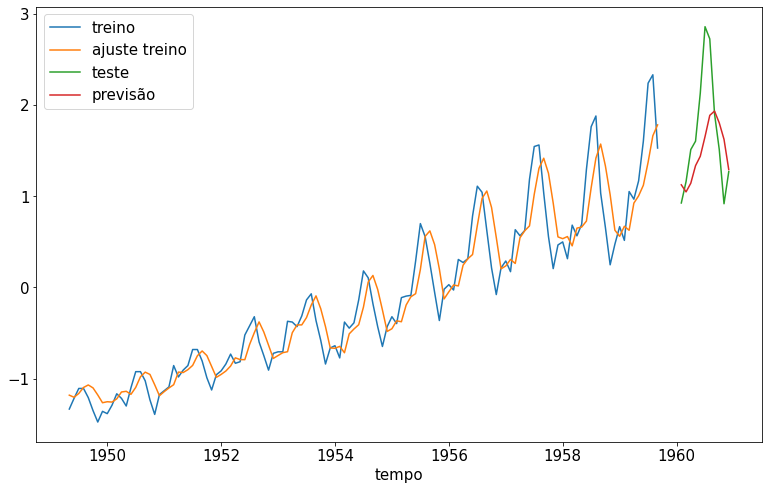

In [84]:
sns.lineplot(x='tempo', y=ytreino_novo, data= passageiros[4:129], label='treino')
sns.lineplot(x='tempo', y=resultado_treino.values, data=passageiros[4:129], label= 'ajuste treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[133:144], label= 'teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[133:144], label= 'previsão')

In [86]:
bike = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv')
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [87]:
bike['datas'] = pd.to_datetime(bike['datas'])

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

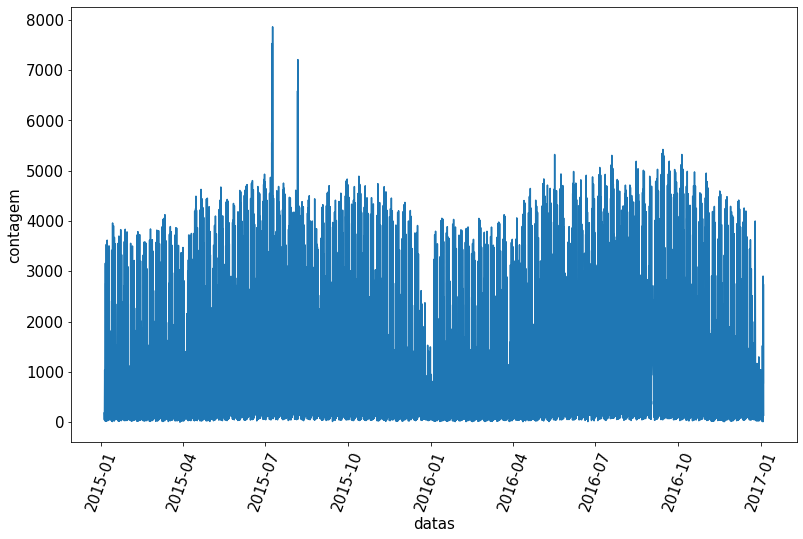

In [88]:
sns.lineplot(x='datas', y='contagem', data=bike)
plt.xticks(rotation=70)

In [89]:
sc2= StandardScaler()

In [92]:
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler()

In [93]:
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

In [94]:
tamanho_treino= int(len(bike)*0.9)
tamanho_teste=len(bike)-tamanho_treino

In [95]:
ytreino=y[0:tamanho_treino]

In [96]:
yteste= y[tamanho_treino:len(bike)]

<AxesSubplot:xlabel='datas'>

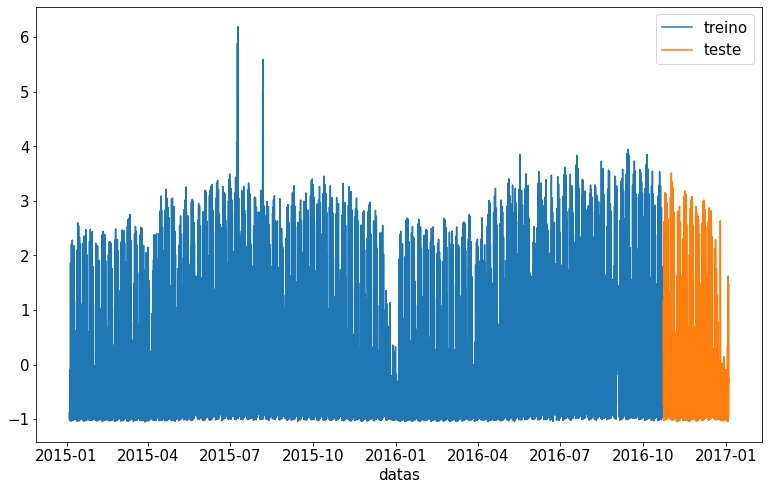

In [99]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')

In [100]:
vetor = pd.DataFrame(ytreino)[0]

In [101]:
xtreino_novo,ytreino_novo = separa_dados(vetor,10)

In [102]:
xtreino_novo

array([[-0.88574518, -0.9262953 , -0.92998167, ..., -0.9843557 ,
        -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, ..., -0.93274645,
        -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, ..., -0.77607553,
        -0.56687377, -0.38347663],
       ...,
       [-0.02774148, -0.29131727, -0.4323211 , ..., -0.72630948,
        -0.8534894 , -0.91523618],
       [-0.29131727, -0.4323211 , -0.51065656, ..., -0.8534894 ,
        -0.91523618, -0.9548647 ],
       [-0.4323211 , -0.51065656, -0.55212827, ..., -0.91523618,
        -0.9548647 , -0.9548647 ]])

In [103]:
vetor2=pd.DataFrame(yteste)[0]

In [104]:
xteste_novo, yteste_novo= separa_dados(vetor2,10)

In [105]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0], xtreino_novo.shape[1],1))

In [106]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0], xteste_novo.shape[1],1))

In [109]:
from tensorflow.keras.layers import LSTM

In [110]:
recorrente = Sequential()

In [111]:
recorrente.add(LSTM(128,input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))

In [112]:
recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')

In [113]:
recorrente.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [114]:
resultado = recorrente.fit(xtreino_novo,ytreino_novo,
               validation_data=(xteste_novo,yteste_novo), epochs=100)

Epoch 1/100
490/490 [==============================] - 4s 6ms/step - loss: 0.2593 - val_loss: 0.0842
Epoch 2/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0769 - val_loss: 0.0428
Epoch 3/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0556 - val_loss: 0.0403
Epoch 4/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0467 - val_loss: 0.0339
Epoch 5/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0423 - val_loss: 0.0243
Epoch 6/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0395 - val_loss: 0.0489
Epoch 7/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0378 - val_loss: 0.0278
Epoch 8/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0354 - val_loss: 0.0250
Epoch 9/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0343 - val_loss: 0.0227
Epoch 10/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0337 - val_lo

490/490 [==============================] - 3s 5ms/step - loss: 0.0183 - val_loss: 0.0147
Epoch 82/100
490/490 [==============================] - 3s 5ms/step - loss: 0.0182 - val_loss: 0.0157
Epoch 83/100
490/490 [==============================] - 3s 5ms/step - loss: 0.0181 - val_loss: 0.0151
Epoch 84/100
490/490 [==============================] - 3s 5ms/step - loss: 0.0180 - val_loss: 0.0147
Epoch 85/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0180 - val_loss: 0.0152
Epoch 86/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0179 - val_loss: 0.0153
Epoch 87/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0176 - val_loss: 0.0160
Epoch 88/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0176 - val_loss: 0.0156
Epoch 89/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0174 - val_loss: 0.0147
Epoch 90/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0176 - val_loss: 

In [115]:
y_ajustado=recorrente.predict(xtreino_novo)

<AxesSubplot:xlabel='datas'>

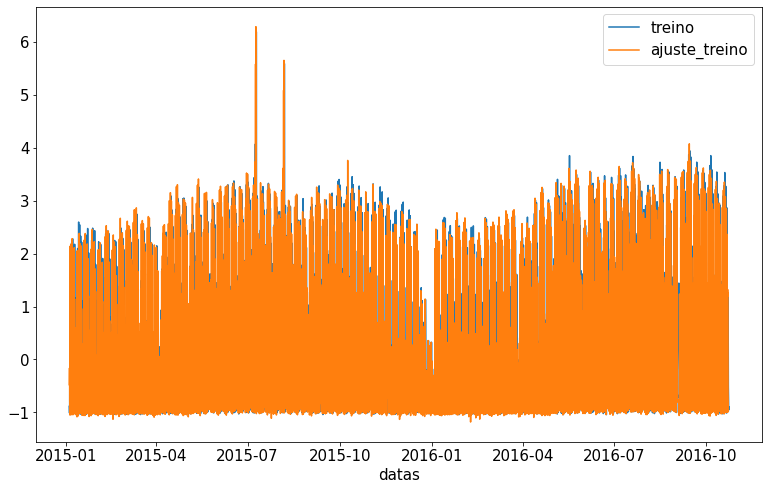

In [117]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=y_ajustado[:,0], data=bike[0:15662], label='ajuste_treino')

In [118]:
y_predito=recorrente.predict(xteste_novo)

<AxesSubplot:xlabel='datas'>

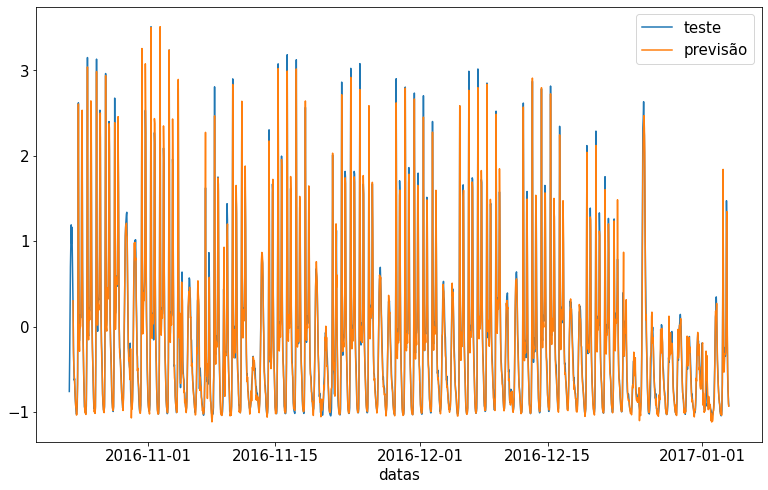

In [122]:
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')
sns.lineplot(x='datas', y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)], label='previsão')

In [124]:
from tensorflow.keras.layers import GRU

In [125]:
recorrente_g=Sequential()

In [126]:
recorrente_g.add(GRU(128,input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente_g.add(Dense(units=1))

In [127]:
recorrente_g.compile(loss='mean_squared_error', optimizer='RMSProp')

In [128]:
recorrente.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [129]:
recorrente_g.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [130]:
resultado2=recorrente_g.fit(xtreino_novo,ytreino_novo,
                           validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
490/490 [==============================] - 4s 5ms/step - loss: 0.2105 - val_loss: 0.0562
Epoch 2/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0623 - val_loss: 0.0334
Epoch 3/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0484 - val_loss: 0.0334
Epoch 4/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0420 - val_loss: 0.0251
Epoch 5/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0374 - val_loss: 0.0284
Epoch 6/100
490/490 [==============================] - 3s 5ms/step - loss: 0.0359 - val_loss: 0.0239
Epoch 7/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0341 - val_loss: 0.0211
Epoch 8/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0330 - val_loss: 0.0217
Epoch 9/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0317 - val_loss: 0.0208
Epoch 10/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0312 - val_lo

490/490 [==============================] - 2s 5ms/step - loss: 0.0167 - val_loss: 0.0160
Epoch 82/100
490/490 [==============================] - 2s 4ms/step - loss: 0.0167 - val_loss: 0.0149
Epoch 83/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0167 - val_loss: 0.0171
Epoch 84/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0168 - val_loss: 0.0166
Epoch 85/100
490/490 [==============================] - 2s 4ms/step - loss: 0.0165 - val_loss: 0.0149
Epoch 86/100
490/490 [==============================] - 2s 4ms/step - loss: 0.0164 - val_loss: 0.0155
Epoch 87/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0162 - val_loss: 0.0175
Epoch 88/100
490/490 [==============================] - 2s 4ms/step - loss: 0.0162 - val_loss: 0.0158
Epoch 89/100
490/490 [==============================] - 2s 4ms/step - loss: 0.0161 - val_loss: 0.0176
Epoch 90/100
490/490 [==============================] - 2s 4ms/step - loss: 0.0163 - val_loss: 

In [131]:
y_predito2 = recorrente_g.predict(xteste_novo)

<AxesSubplot:xlabel='datas'>

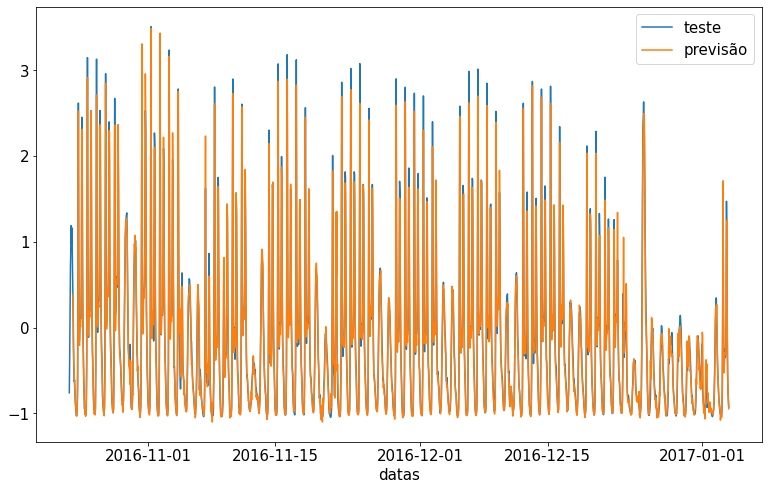

In [132]:
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')
sns.lineplot(x='datas', y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)], label='previsão')

In [133]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


Text(0, 0.5, 'Custo')

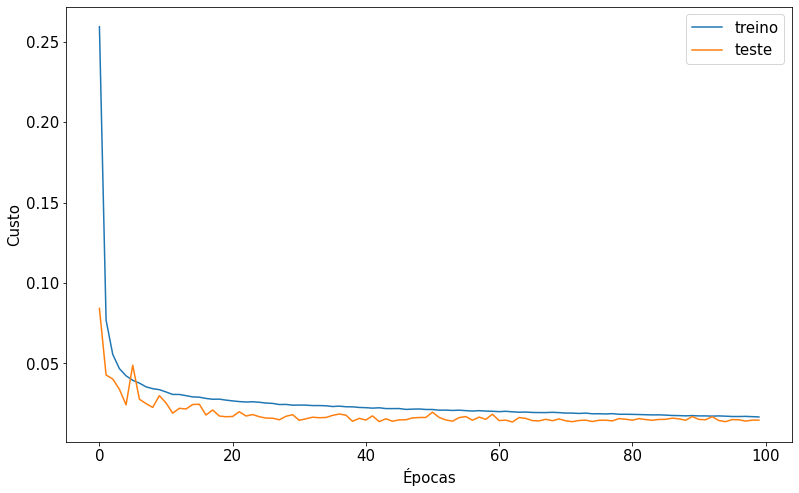

In [139]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino','teste'])
plt.xlabel('Épocas')
plt.ylabel('Custo')

Text(0, 0.5, 'Custo')

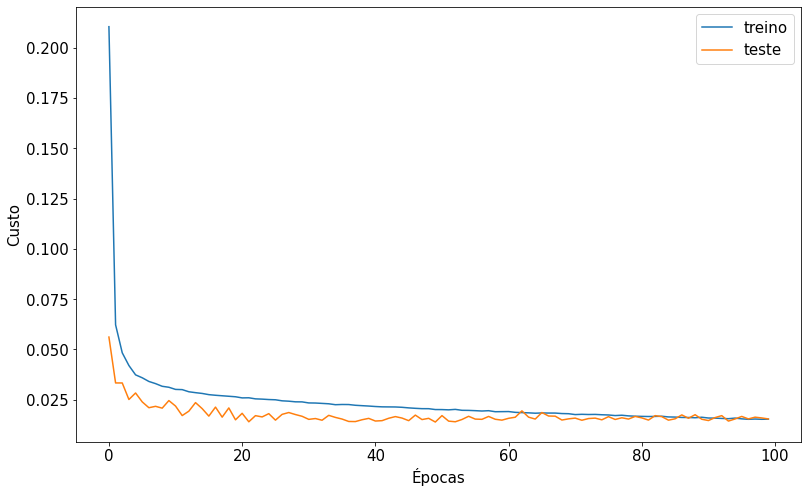

In [138]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino','teste'])
plt.xlabel('Épocas')
plt.ylabel('Custo')